In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [101]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
len(df)

7043

In [103]:
df.head(3).T

,0,1,2
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK
gender,Female,Male,Male
SeniorCitizen,0,0,0
Partner,Yes,No,No
Dependents,No,No,No
tenure,1,34,2
PhoneService,No,Yes,Yes
MultipleLines,No phone service,No,No
InternetService,DSL,DSL,DSL
OnlineSecurity,No,Yes,Yes


In [104]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [105]:
total_charges = pd.to_numeric(df.TotalCharges, errors="coerce")

In [106]:
df[total_charges.isnull()][['customerID', "TotalCharges"]]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [107]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")
df.TotalCharges = df.TotalCharges.fillna(0)

Приведем к единому стилю имена столбцов

In [108]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

Преобразуем катигориальную переменную yes - 1, no - 0

In [109]:
df.churn = (df.churn == "yes").astype("int")

Разделим наш датафрейм на две выборки используя встроенный метод sklearn


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [112]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

Выделим из данных целевую переменную

In [113]:
X_train = df_train.drop("churn", axis=1)
X_val = df_val.drop("churn", axis=1)

y_train = df_train.churn.values
y_val = df_val.churn.values

### Исследовательский анализ

In [114]:
df_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Исследуем распределение целевой переменной

In [115]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [116]:
# Расчитаем коэффициент оттока
global_mean = df_train_full.churn.mean()
round(global_mean, 3) # 27% доля оттока клиентов

np.float64(0.27)

In [117]:
df_train_full.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [118]:
# Создадим два массива с котигориальными и числовыми признаками
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies',
    'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [119]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [120]:
avg_churn_by_gender = df.groupby("gender").churn.mean().round(3)
female_mean_churn = avg_churn_by_gender["female"]
male_mean_churn = avg_churn_by_gender["male"]

global_mean_churn = df.churn.mean().round(3)

In [121]:
avg_churn_by_gender

gender
female    0.269
male      0.262
Name: churn, dtype: float64

In [122]:
global_mean_churn

np.float64(0.265)

Уровень оттока клиентов-женщин составляет 26.9 %, а клиентов-мужчин - 26.2 %, тогда как глобальный уровень оттока составляет 27 %. Разница между групповыми коэффициентами женщин и мужчин довольно мала, и это указывает на то, что значение пола клиента не поможет нам определить, расторгнет ли он договор.

Посмотрим теперь на коэффициент оттока в столбце partner

In [123]:
partner_churn_mean = df.groupby("partner").churn.mean().round(3)
partner_churn_mean

partner
no     0.330
yes    0.197
Name: churn, dtype: float64

Здесь мы видим, что коэффициенты у тех, у кого имеется партнер, сильно отличаются от показателей тех, у кого его нет: 20 или 33 % соответсвенно. Это означает, что клиенты, у которых нет партнера, имеют больше шансов расторгнуть договор, чем те, у которого он есть.

#### коэффициент риска

В дополнение к рассмтрению разницы между групповыми и глобальными коэффициентом, интересно взглянуть и на соотношение между ними. В статистике соотношение между вероятностями в разных группах называется <i>коэффициентом риска</i>, где риск относится к риску возникновению эффекта. В нашем случае эффект - отток, так что риск оттока выглядит так:
    
            риск  = групповой коэффициент / глобальный коэффициент

Например, для female риск оттока составит 0.99:

            риск = 26.9 % / 27 % = 0.99

Риск - это число от нуля до бесконечности. У него есть полезная интерпретация, которая показывает вероятность того, насколько элементы группы испытают эффект (отток) по сравнению со всей совокупностью элементов.

Группа с риском, близким к 1, вообще не является группой риска.

Если риск 1, то группа имеет более низкие риски.

Если значение риска выше 1, эта группа риска: в ней ожидается большой отток, чем среди обшего числа.

In [124]:
global_mean_churn = df_train_full.churn.mean()

df_group = df_train_full.groupby("gender").churn.agg(["mean"])
df_group["diff"] = df_group["mean"] - global_mean
df_group["risk"] = df_group["mean"] / global_mean

df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


Мы вычислили средний отток, разницу от глобального оттока и риск для каждой группы пола.

Проделаем это для всех категориальных переменных.

In [125]:
from IPython.display import display

for col in categorical:
    df_group = df_train_full.groupby(col).churn.agg(["mean"])
    df_group["diff"] = df_group["mean"] - global_mean
    df_group["risk"] = df_group["mean"] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


Таким образом, просто взглянув на разницы и риски, мы можем определить наиболее отличительные признаки - те, которые будут полезны для выявления оттока. Таким образом, можно ожидаь, что эти признаки окажутся полезными для наших будущих моделей.

#### Взаимная информация

Различия, которые мы рассмотрели, полезны в нашем анали и важны для понимания данных, но их трудно использовать, для определения того, какой признак наиболее важен и является ли переменная технической поддержки более полезной, чем тип контакта. 

На помощь приходят показатели важности: мы можем измерить степень зависимости между категориальной и целевоей переменной. Если две переменные являются зависемыми, то знание значения одной переменной дает нам некоторую инофрмацию о другой. С другой стороны, если переменная полностью независима от целевой переменной, то является бесполещной и может быть безопасно удалена из набора данных.

В нашем случае знание о том, что у клиетна заключен ежемесячный контракт, может указывать на то, что данный клиент скорее уйдет, чем останется.

Взаимная информация уже реализована в sklearn в функции mutual_info_score из пакета metrics, поэтому можем просто ее исползовать:

In [126]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")

df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


#### Коэффициент корреляции

Взаимная инофрмация - способ количественной оценки степени зависимости между двумя категориальными переменными, но он не сработает, когда один из признаков числовой, поэтому мы не сможем применить его к трем числовым переменным, которые у нас есть.

Однако мы можем измерить зависимость между двоичной целевой переменной и числовой переменной. Мы можем притвориться, что двоичная переменная является числовой, а затем использоваться классические методы статистики, чтобы проверить наличие какой-либо зависимости между этими переменными. 

Одним из таких методов служит коэффициент *корреляции*. Это значение от -1 до 1:

* положительная корреляция означает, что когда одна переменная увеличивается, другая также увеличивается.

* нулевая корреляция означается отсутсвие связи между двумя переменными

* отрицательная корреляцияЮ возникает, когда одна переменная увеличивается, а другая уменьшается.


In [127]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

### Feature Engeneering

In [128]:
# преобразуем DataFrame в список словарей
train_dict = df_train[categorical + numerical].to_dict(orient="records")
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [129]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


В этом коде мы создаем экземпляр DictVectorizer. Данный метод просматривает содержимое этих словарей и вычисляет возможные значения для каждой переменной и то, как сопоставить их со столбцами в выходной матрице. Если объект является категориальым, то применяется схема прямого кодирования, но если оюъект числовой, то он остается нетронутым.

Параметр *sparse=False* означает, что созданная матрица не будет разряженной и вместо такой матрицы будет создан простой массив NumPy. 

После того как мы настроили векторизацию, мы можем преобразовать словари в матрицу с помощью метода transform.

In [130]:
X_train = dv.transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

Большинство элементов представляют собой единицы и нули - это категорилаьные переменные после прямого кодирования. Однако не все из них представлены едининцами и нулями. Легко заметить, что три из них - другие числа. Это наши числовые переменные.

Мы можем узнать имена всех стобцов, используя метод *get_feature_names_out*:

In [131]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

Для каждого категорилаьного признака создается несколько столбцов для каждого из его отдельных значений. Для *contact* у нас *contact=mont-to-month, contact-one_year и contact=two_year*, а для *depedents - dependents=no и dependents=yes*. Числовые признаки сохраняются свои исходные названия.

Теперь, когда наши функции закодированы в виде матрицы, можем перейти к использованию модели для прогонозирования отока.

## Машинное обучение для классификации
### Логистическая регрессия

Логистическая регрессия имеет много общенго с линейной.
Модель линейной регрессии - это регрессионная модель, которая может прогнозировать число.

Логистическая регрессия также является линейной моделью, но, в отличие от линейной регрессии, это классификационная модель, а не регрессионная, хотя название и указывает на обратное. Это модель двоичной классификации, поэтому целевая переменная $y_i$ является двоичной; единственные значения, которые она может принять, - это 0 и 1.

Результатом логистической регрессия является вероятность того, что наблюдение $x_i$ является положительным, или, другими словами, вероятность того, что $y_i = 1$. В нашем случае это вероятность того, что клиент *i* расторгнет договор.

Чтобы рассматривать выходные данны как вероятность, нам нужно гарантировать, что прогнозы модели всегда остаются в диапазоне между нулем и единицей.

Для этой цели мы используем специальну маетматическую функцию, называемую сигмоидальной, и полная формула для модели логистической регресии выглядит следующим образом:
$$ g(x_{i}) = sigmoid(w_{0} + x_{i}^{T}w).$$

Если мы сравним это с формулой линейной регресси, то единственным различием будет эта сигмоидлаьная функция: в случае линейной регрессии мы имеем только $w_{0} + x_{i}^{T}w$. Вот почему обе эти модели линейны - они основаны на операции скалярного произведения.

Сигмоидальная функция преобразует любое значение в число от нуля до единицы. Это определяется следующим образом:

$$ sigmoid(x) = \frac{1}{1 + exp(-x)} $$.
    
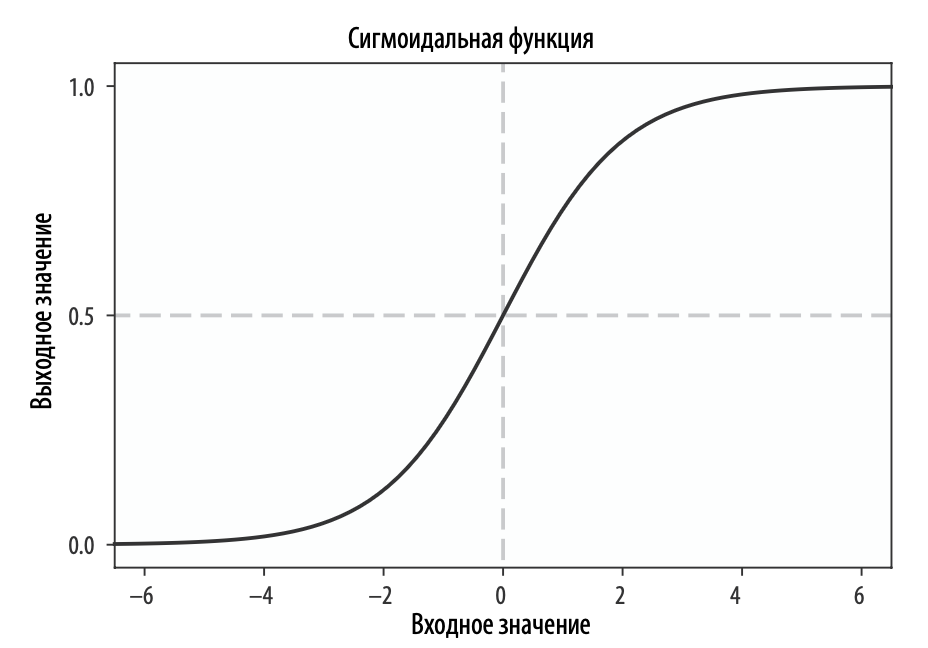

Мы помним, что если вектор признаков $x_i$ является n-мерным, то скалярное произведение $x_{i}^{T}w$ может быть развернуто в виде суммы, и мы можем записать $g(x_i) как 

$$ g(x_{i}) = sigmoid(w_{0} + x_{i1}w_{1} + x_{i2}w_{2} + ... + x_{in}w_{n}). $$

Или, используя обозначение суммы, как 

$$ g(x_{i}) = sigmoid(w_{0} + \sum^{n}_{j=1}x_{ij}w_{j}). $$

Переведем формулу на Python для иллюстрации. 
Модель линейной регресси имеет следующую формулу:
$$ g(x_{i}) = w_{0} + \sum^{n}_{j=1}x_{ij}w_{j}. $$

In [160]:
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score += xi[j] * w[j]
    prob = sigmoid(score)
    return prob

Также, нам нужно определить гимоидальную функцию

In [161]:
import math

def sigmoid(score):
    return 1 / (1 + math.exp(-score))

Чтобы узнать веса, нам нужно обучить модель.

In [162]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


Класс LogisticRgression из sklearn инкапсулирует логику обучения, лежащую в основе этой модели. Он настраивается, и мы можем менять довольно много параметров. Фактически мы уже указали два из них: solver и random_state.

- random_state - начальное значение для генератора случайных чисел. Данные при обучении модели перетасовываются, и чтобы убедиться, что перетасовка каждый раз одинакова, мы фиксируем начальное значение.
- solver - базовая библиотека оптимизации. Что бы убедиться, что наши результаты воспроизводимы в более поздних версиях, мы также устанавливаем этот параметр.

Другие полезные параметры для моделей включают параметр С, который управляет уровнем регуляризации. По умолчанию принимает значение 1.0.

Посмотрим, насколько хорошо работает обученная модель. Применим ее к проверочным данным, чтобы получить вероятность оттока для каждого клиента в проверочном наборе.

Для этого придется применить схему прямого кодирования ко всем категориальным переменны. Сначала преобразуем датафрейм в список словарей, а затем передадим его в DictVevtorizer, который мы обучили ранее:

In [163]:
val_dict = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dict)

Чтобы получить вероятности, используем метод модели *predict_proba*:

In [164]:
y_pred = model.predict_proba(X_val)
y_pred
# [[0.7650904 , 0.2349096 ]] - первое значение вероятность оттока p, а второе отсутсвия оттока 1 - p.

array([[0.7650904 , 0.2349096 ],
       [0.73113804, 0.26886196],
       [0.6805489 , 0.3194511 ],
       ...,
       [0.94274833, 0.05725167],
       [0.38477034, 0.61522966],
       [0.93872731, 0.06127269]], shape=(1860, 2))

Нам не нужны оба столбца, поэтому достаточно иметь только второй столбец прогноза. Чтобы выбрать только один столбец из двумерного массива в NumPy, мы модем использовать срез [:, 1]:

- : означает выбрать все строки
- 1 означает, что выбрать нужно только столбец с индексом 1.

In [165]:
y_pred = y_pred[:, 1]
y_pred

array([0.2349096 , 0.26886196, 0.3194511 , ..., 0.05725167, 0.61522966,
       0.06127269], shape=(1860,))

Такие выходные данные (вероятности) называют часто *мягкимии* прогнозами. Они выражают вероятность ухода в виде числа от нуля до едининцы. Нам остается решить, как интерпретировать это число и как его использовать.

Чтобы принять верное решение о том, следует ли отправлять рекламное письмо тому или иному клиенту, недостаточно использовать только вероятность. Нам нужны *твердые* прогнозы - двоичные значения True или False. Чтобы получить двоичные прогнозы, мы берем вероятности и делаем разрез выше определенного порога. Если вероятность клиента выше этого порога, то мы прогнозируем отток, в противном случае - его отсутсвие. Если сы выберем 0,5 в качестве такого порога, то делать двоичные прогнозы будет легко. Мы просто используем оператор >=:

```python
y_pred >= 0.5
```

операторы сравнения numpy применяются поэлементо, и результатом будет новый массив, содержащий только логические значения: True и False.

Запишем результаты в массив churn:

In [166]:
churn = y_pred >= 0.5
churn

array([False, False, False, ..., False,  True, False], shape=(1860,))

Получив эти новые точные прогнозы, необходимо понять, насколько они хороши. Для этого мы готовы перейти к следующему шагу: оценке качества прогнозов.

Самая простая проверка - сравнение каждого прогонза с фактическим значением.  Посчитав, сколько раз наши прогнозы совпали с фактическим значением, мы сможем использовать этот показатель для измерения качества модели.

Такой показатель качества называется *достоверностью*.

In [167]:
(y_val == churn).mean()

np.float64(0.8016129032258065)

На выходе мы получили 0.8. Это означает, что прогнозы модели соответсвовали фактическому значению в 80% случаев, или модель делает правильные прогнозы в 80% случаев. Это то, что мы называем достоверностью модели.

#### Интерпретация модели

Мы знаем, что модель логистической регресси имеет два параметра, которые она извлекает из данных:

- $w_0$ - компонент смещения
- $w = (w_1, w_2, ..., w_n)$ - вектор весов

Мы можем получить компонент смещения из ```model.intecept_[0]```.
Остальные веса хранятся в ```model_coef_[0]```. Если заглянем внутрь, то увидим, что это просто моссив чисел, значение которого трудно понять.

Чтобы увидеть, акой признак связан с каждым весом, воспользуемся методом ```get_feature_names_out``` из DictVectorizer. Предварительно можнон объединить названия признаков с коэффициентами:

In [168]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.563),
 'contract=one_year': np.float64(-0.086),
 'contract=two_year': np.float64(-0.599),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.092),
 'deviceprotection=no': np.float64(0.1),
 'deviceprotection=no_internet_service': np.float64(-0.116),
 'deviceprotection=yes': np.float64(-0.106),
 'gender=female': np.float64(-0.027),
 'gender=male': np.float64(-0.095),
 'internetservice=dsl': np.float64(-0.323),
 'internetservice=fiber_optic': np.float64(0.317),
 'internetservice=no': np.float64(-0.116),
 'monthlycharges': np.float64(0.001),
 'multiplelines=no': np.float64(-0.168),
 'multiplelines=no_phone_service': np.float64(0.127),
 'multiplelines=yes': np.float64(-0.081),
 'onlinebackup=no': np.float64(0.136),
 'onlinebackup=no_internet_service': np.float64(-0.116),
 'onlinebackup=yes': np.float64(-0.142),
 'onlinesecurity=no': np.float64(0.258),
 'onlinesecurity=no_internet_service': np.float64(-0.116),
 'onlinesecurity=yes':

Чтобы понять, как работает модель, узнаем, что происходит при ее применении. Чтобы облегчить восприятие, обучим более простую и компактную модель, которая использует три переменные: ```contract, tenure, totalcharges```.
Повторим те же шаги, которые мы уже делали для обучения, но на этот раз используем меньший набор признаков:

In [169]:
small_subset = ["contract", "tenure", "totalcharges"]
train_dict_small = df_train[small_subset].to_dict(orient="records")
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

In [170]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [171]:
model_small = LogisticRegression(solver="liblinear", random_state=1)
model_small.fit(X_small_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [172]:
model_small.intercept_[0]

np.float64(-0.5772299097126418)

In [173]:
dict(zip(dv_small.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.563),
 'contract=one_year': np.float64(-0.086),
 'contract=two_year': np.float64(-0.599),
 'tenure': np.float64(-0.03),
 'totalcharges': np.float64(-0.092)}